In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop , SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
import numpy as np

In [24]:
Num_Classes = 7
img_width, img_height = 48, 48
Batchsize = 64
train_sample = 0
validation_sample = 0
ephos = 25
train_dir = r'train'
validation_dir = r'test'
Model_Name = "ModelFace_Expression_AI.h5"
model = Sequential()

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,shear_range=0.3,zoom_range=0.3,width_shift_range=0.4,height_shift_range=0.4,horizontal_flip=True,vertical_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_generation = train_datagen.flow_from_directory(train_dir, color_mode='grayscale', target_size=(img_width, img_height), batch_size=Batchsize, class_mode='categorical',shuffle=True)
valid_generation = valid_datagen.flow_from_directory(validation_dir, color_mode='grayscale', target_size=(img_width, img_height), batch_size=Batchsize, class_mode='categorical',shuffle=True)
train_sample = train_generation.samples
validation_sample = valid_generation.samples

Found 28731 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [26]:
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [28]:
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [29]:
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [30]:
model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [31]:
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [32]:
model.add(Dense(Num_Classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 1,328,167 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [33]:
CheckPoint = ModelCheckpoint(f"Model\\{Model_Name}",monitor='val_loss',mode='min',save_best_only=True,verbose=1)
EarlyStop = EarlyStopping(monitor='val_loss',mode='min',patience=3,verbose=1)
ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

callback = [CheckPoint, EarlyStop, ReduceLR]

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [35]:
try:
    model.load_weights(f"Model\\{Model_Name}")
except Exception as e:
    print(f"{e},\n you dont have pretrained model : -> {Model_Name}\nStaring to train new model from scratch")

[Errno 2] Unable to synchronously open file (unable to open file: name = 'Model\ModelFace_Expression_AI.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0),
 you dont have pretrained model : -> ModelFace_Expression_AI.h5
Staring to train new model from scratch


In [36]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(train_generation.classes),
    y=train_generation.classes
)
class_weights = dict(enumerate(class_weights))

In [37]:
history = model.fit(train_generation, steps_per_epoch=train_sample // Batchsize, epochs=ephos,callbacks=callback, validation_data=valid_generation, validation_steps=validation_sample // Batchsize,class_weight= class_weights)

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1394 - loss: 2.8160
Epoch 1: val_loss improved from inf to 1.94434, saving model to Model\ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 673s 1s/step - accuracy: 0.1394 - loss: 2.8153 - val_accuracy: 0.1429 - val_loss: 1.9443 - learning_rate: 0.0010
Epoch 2/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:03 277ms/step - accuracy: 0.1562 - loss: 2.6795

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 1.94434
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1562 - loss: 2.6795 - val_accuracy: 0.1456 - val_loss: 1.9444 - learning_rate: 0.0010
Epoch 3/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.1472 - loss: 2.1234
Epoch 3: val_loss improved from 1.94434 to 1.91175, saving model to Model\ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 323s 719ms/step - accuracy: 0.1472 - loss: 2.1232 - val_accuracy: 0.1903 - val_loss: 1.9118 - learning_rate: 0.0010
Epoch 4/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:33 344ms/step - accuracy: 0.1562 - loss: 1.7523
Epoch 4: val_loss improved from 1.91175 to 1.91124, saving model to Model\ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1562 - loss: 1.7523 - val_accuracy: 0.1915 - val_loss: 1.9112 - learning_rate: 0.0010
Epoch 5/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.1500 - loss: 1.9568
Epoch 5: val_loss did not improve from 1.91124
448/448 ━━━━━━━━━━━━━━━━━━━━ 133s 297ms/step - accuracy: 0.1500 - loss: 1.9568 - val_accuracy: 0.2040 - val_loss: 1.9198 - learning_rate: 0.0010
Epoch 6/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:54 256ms/step - accuracy: 0.2500 - loss: 1.5617
Epoch 6: val_loss did not improve from 1.91124
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.2500 - loss: 1.5617 - val_accuracy: 0.2054 - val_loss: 1.9194 - learning_rate: 0.0010
Epoch 7/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.1573 - loss: 1.9599
Epoch 7: val_loss improved from 1.91124 to 1.90383, saving model to Model\ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 131s 292ms/step - accuracy: 0.1573 - loss: 1.9598 - val_accuracy: 0.2359 - val_loss: 1.9038 - learning_rate: 0.0010
Epoch 8/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:17 308ms/step - accuracy: 0.1406 - loss: 1.6045
Epoch 8: val_loss did not improve from 1.90383
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.1406 - loss: 1.6045 - val_accuracy: 0.2344 - val_loss: 1.9040 - learning_rate: 0.0010
Epoch 9/25
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.1689 - loss: 1.9216
Epoch 9: val_loss did not improve from 1.90383
448/448 ━━━━━━━━━━━━━━━━━━━━ 138s 309ms/step - accuracy: 0.1689 - loss: 1.9216 - val_accuracy: 0.1385 - val_loss: 1.9480 - learning_rate: 0.0010
Epoch 10/25
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:57 262ms/step - accuracy: 0.1719 - loss: 1.6580
Epoch 10: val_loss did not improve from 1.90383

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.1719 - loss: 1.6580 - 

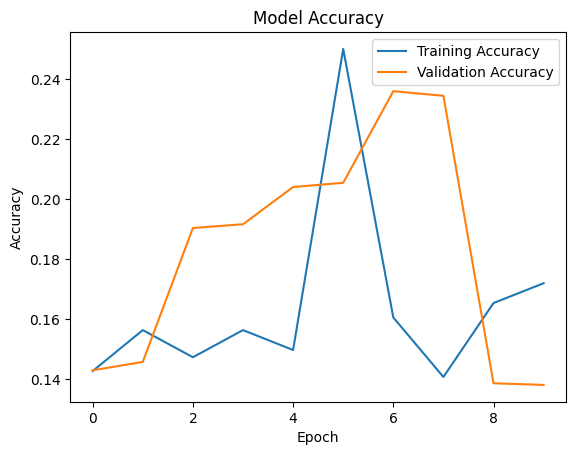

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


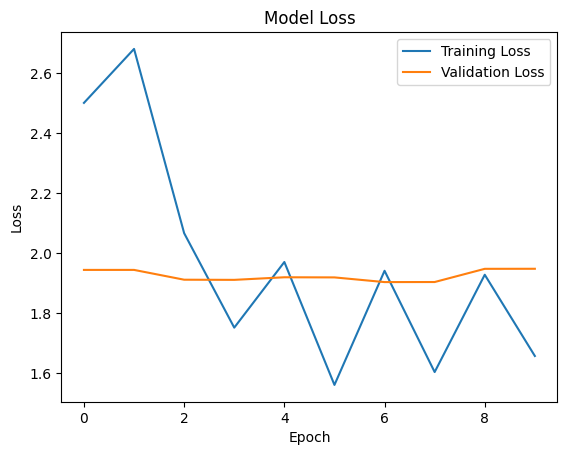

In [39]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step


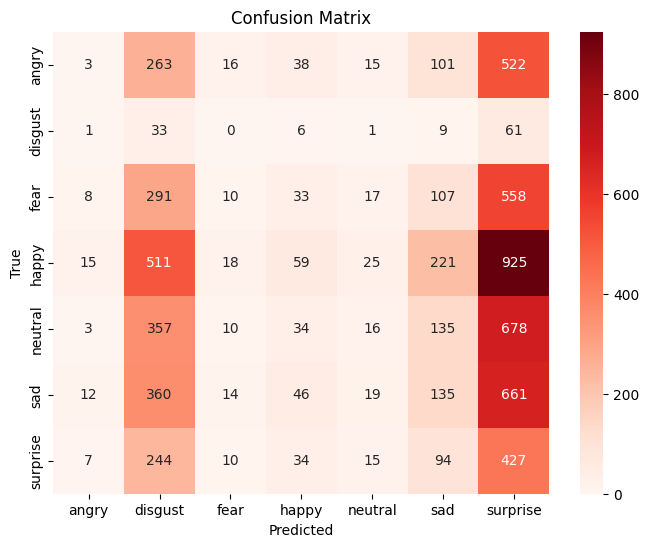

              precision    recall  f1-score   support

       angry       0.06      0.00      0.01       958
     disgust       0.02      0.30      0.03       111
        fear       0.13      0.01      0.02      1024
       happy       0.24      0.03      0.06      1774
     neutral       0.15      0.01      0.02      1233
         sad       0.17      0.11      0.13      1247
    surprise       0.11      0.51      0.18       831

    accuracy                           0.10      7178
   macro avg       0.12      0.14      0.06      7178
weighted avg       0.15      0.10      0.07      7178



In [40]:
valid_generation.reset()
y_pred = model.predict(valid_generation, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid_generation.classes
class_labels = list(valid_generation.class_indices.keys())

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_labels))
